# **1. Perkenalan Dataset**

Pada proyek ini, saya menggunakan dataset **Telco Customer Churn** dari [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).  
Studi kasus: Memprediksi apakah pelanggan akan berhenti menggunakan layanan Telco berdasarkan data demografi dan layanan yang digunakan.


In [ ]:
# ================================
# 2. IMPORT LIBRARY
# ================================

# Data analysis & visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display lebih rapi di notebook
from IPython.display import display

# Untuk preprocessing dan machine learning
from sklearn.preprocessing import StandardScaler

# (Tambahkan import lain kalau di bawah nanti dipakai, contoh ML model)
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# Pengaturan tampilan pandas (opsional, biar tabel rapi)
pd.set_option('display.max_columns', 100)


In [ ]:
# ================================
# 3. MEMUAT DATASET
# ================================

from google.colab import files
uploaded = files.upload() # upload kaggle.json

import os, shutil
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 0o600)

!pip install -q kaggle
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip -o telco-customer-churn.zip

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print('5 data teratas:')
display(df.head())

# Cek dimensi data dan info tipe kolom (ini sering dicek reviewer!)
print('\nJumlah baris dan kolom:', df.shape)
print('\nInfo kolom dan tipe data:')
df.info()

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 238MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  
5 data teratas:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Jumlah baris dan kolom: (7043, 21)

Info kolom dan tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Jumlah missing value per kolom:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0



Distribusi label Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


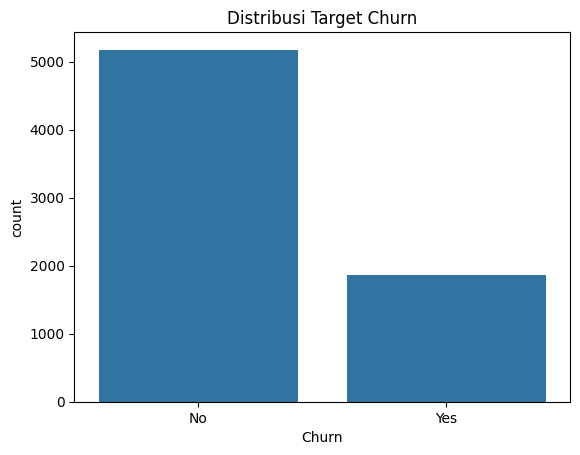

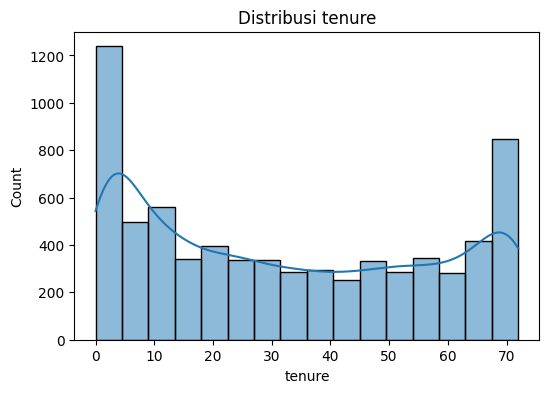

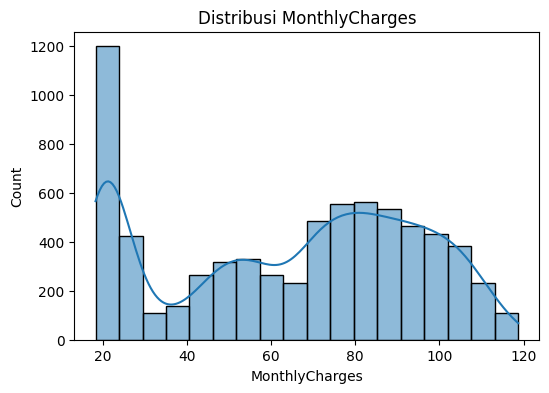

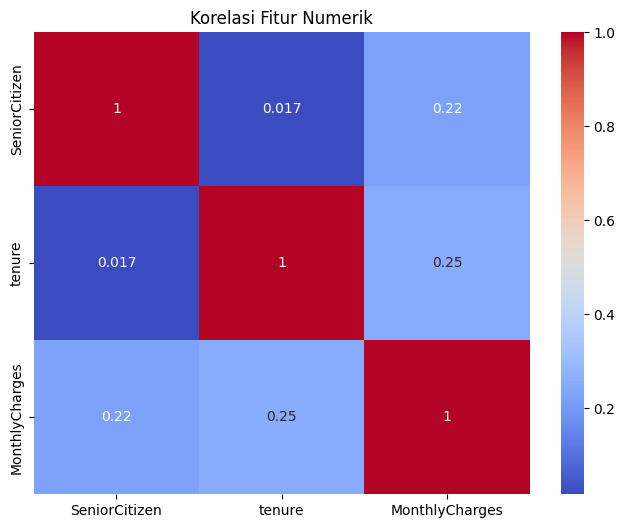

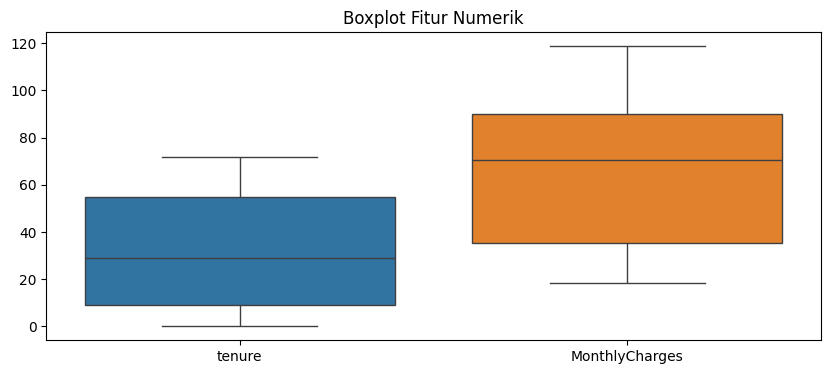

In [ ]:
# ================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ================================

# 1. Info tipe data & jumlah data
print("Info data:")
df.info()

# 2. Statistik deskriptif fitur numerik
print("\nStatistik deskriptif (numerik):")
display(df.describe())

# 3. Jumlah missing value tiap kolom
print("\nJumlah missing value per kolom:")
display(df.isnull().sum())

# 4. Distribusi label target (Churn)
print("\nDistribusi label Churn:")
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Target Churn')
plt.show()

# 5. Visualisasi distribusi fitur numerik (histogram)
num_cols = ['tenure', 'MonthlyCharges']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# 6. Korelasi fitur numerik
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

# 7. Deteksi outlier awal (boxplot fitur numerik)
plt.figure(figsize=(10,4))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot Fitur Numerik')
plt.show()


<ipython-input-4-3333155331>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['TotalCharges'].fillna(df_prep['TotalCharges'].median(), inplace=True)


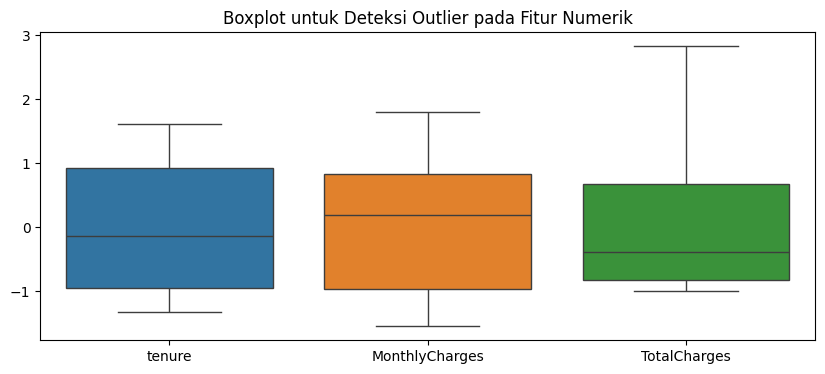

Contoh hasil preprocessing:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.282728,0,1,-1.164135,-0.997328,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.062387,1,0,-0.262811,-0.176347,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,-1.241967,1,1,-0.365914,-0.962760,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.510759,0,0,-0.750058,-0.197869,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,-1.241967,1,1,0.194503,-0.943556,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False


In [ ]:
# ================================
# 5. DATA PREPROCESSING
# ================================

# Copy data
df_prep = df.copy()

# 1. Hapus kolom ID (bukan fitur)
df_prep.drop('customerID', axis=1, inplace=True)

# 2. Konversi TotalCharges ke numerik dan tangani missing value
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')
df_prep['TotalCharges'].fillna(df_prep['TotalCharges'].median(), inplace=True)

# 3. Hapus data duplikat jika ada
df_prep.drop_duplicates(inplace=True)

# 4. Encoding fitur kategorikal
# Binary encoding (Yes/No, Female/Male)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_prep[col] = df_prep[col].map({'Yes':1, 'No':0, 'Female':1, 'Male':0})

# One-hot encoding untuk fitur multikategori
multi_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Contract', 'PaymentMethod']
df_prep = pd.get_dummies(df_prep, columns=multi_cat)

# 5. Scaling fitur numerik (standarisasi)
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_prep[num_cols] = scaler.fit_transform(df_prep[num_cols])

# 6. (Opsional) Deteksi outlier secara visual, tampilkan boxplot fitur numerik
plt.figure(figsize=(10,4))
sns.boxplot(data=df_prep[num_cols])
plt.title('Boxplot untuk Deteksi Outlier pada Fitur Numerik')
plt.show()

# 7. (Opsional) Contoh Binning (pengelompokan) tenure, jika diperlukan
# # df_prep['tenure_group'] = pd.cut(df_prep['tenure'],
# #                                  bins=[-float('inf'), -1, 0, 1, 2, float('inf')],
# #                                  labels=['very low', 'low', 'medium', 'high', 'very high'])

# Tampilkan hasil akhir
print('Contoh hasil preprocessing:')
display(df_prep.head())
